### Table of Contents:
* [1. Preparing the Data](#1)
* &emsp;[1.1. Importing Libraries](#11)
* [2. Data Cleaning](#2)
* &emsp;[2.1. Identifying Missing Values](#21)
* &emsp;[2.2. Dealing with Missing Values](#22)
* &emsp;[2.3. Removing Rows](#23)
* &emsp;[2.4. Finding Outliers](#24)
* &emsp;&emsp;[2.4.1. IQR Score Method](#241)
* &emsp;[2.5. Box Plot](#25)
* [3. Data Transformation](#3)
* &emsp;[3.1. Binning](#31)
* &emsp;[3.2. Normalization](#32)
* &emsp;&emsp;[3.2.1. Z-score Method](#33)
* [4. Results](#4)
* &emsp;[4.1. Data Cleaning](#41)
* &emsp;[4.2. Data Transformation](#42)

# 1. Preparing the Data <a class="anchor" id="1"></a>

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [5]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline  
plt.style.use('fivethirtyeight')

# 2. Data Cleaning <a class="anchor" id="2"></a>

## 2.1. Identifying Missing Values <a class="anchor" id="21"></a>

In [6]:
df = pd.read_csv('data/raw_training_data.csv')

In [7]:
categorical_features = ['company','rating','released','year',
                        'writer','adult','original_title','title','genres_edited',
                        'production_countries_edited','keywords_edited']
continuous_features = ['budget','score','votes']
target_features = ['isprofit','profitability_ratio']

In [8]:
df.shape # (# rows, # cols)

(3524, 23)

In [9]:
df.head() # take a peak at the dataset

,Unnamed: 0,budget,company,gross,name,rating,released,score,votes,writer,...,profitability_ratio_bucket,adult,id,imdb_id,original_title,title,genres_edited,production_countries_edited,keywords_edited,year_released
0,0,8000000,Columbia Pictures Corporation,52287414,Stand by Me,R,22.08.1986 00:00,8.1,299174,Stephen King,...,550,FALSE,235,tt0092005,Stand by Me,Stand by Me,"Crime, Drama",US,"based on novel, friendship, coming of age, rai...",1986
1,1,6000000,Paramount Pictures,70136369,Ferris Bueller's Day Off,PG-13,11.06.1986 00:00,7.8,264740,John Hughes,...,1070,FALSE,9377,tt0091042,Ferris Bueller's Day Off,Ferris Bueller's Day Off,Comedy,US,"chicago, high school, aftercreditsstinger, dur...",1986
2,2,15000000,Paramount Pictures,179800601,Top Gun,PG,16.05.1986 00:00,6.9,236909,Jim Cash,...,1100,FALSE,744,tt0092099,Top Gun,Top Gun,"Action, Romance, War",US,"lovesickness, loss of lover, fighter pilot, se...",1986
3,3,18500000,Twentieth Century Fox Film Corporation,85160248,Aliens,R,18.07.1986 00:00,8.4,540152,James Cameron,...,360,FALSE,679,tt0090605,Aliens,Aliens,"Horror, Action, Thriller, Science Fiction","GB, US","android, extraterrestrial technology, space ma...",1986
4,4,9000000,Walt Disney Pictures,18564613,Flight of the Navigator,PG,1.08.1986 00:00,6.9,36636,Mark H. Baker,...,110,FALSE,10122,tt0091059,Flight of the Navigator,Flight of the Navigator,"Family, Science Fiction, Adventure",US,"artificial intelligence, farewell, homesicknes...",1986


In [10]:
del df['Unnamed: 0']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3524 non-null   int64  
 1   company                      3524 non-null   object 
 2   gross                        3524 non-null   int64  
 3   name                         3524 non-null   object 
 4   rating                       3524 non-null   object 
 5   released                     3524 non-null   object 
 6   score                        3524 non-null   float64
 7   votes                        3524 non-null   int64  
 8   writer                       3524 non-null   object 
 9   year                         3524 non-null   int64  
 10  isprofit                     3524 non-null   int64  
 11  profitability_ratio          3524 non-null   float64
 12  profitability_ratio_bucket   3524 non-null   int64  
 13  adult             

In [12]:
df.isnull().sum()

budget                           0
company                          0
gross                            0
name                             0
rating                           0
released                         0
score                            0
votes                            0
writer                           0
year                             0
isprofit                         0
profitability_ratio              0
profitability_ratio_bucket       0
adult                            0
id                               0
imdb_id                          0
original_title                   0
title                            0
genres_edited                    0
production_countries_edited     31
keywords_edited                167
year_released                    0
dtype: int64

In [13]:
df.describe()   # before replacing zero with None

,budget,gross,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,year_released
count,3.524000e+03,3.524000e+03,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,3.646837e+07,4.772520e+07,6.339018,9.928306e+04,1997.125709,0.510499,3.996876,399.602157,45443.112656,2002.385641
std,4.063369e+07,6.707121e+07,1.056288,1.568040e+05,101.418026,0.499961,127.868810,12786.904323,77014.289184,8.422442
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,1986.000000
25%,1.000000e+07,6.955428e+06,5.800000,1.554475e+04,1996.000000,0.000000,-0.552571,-60.000000,8864.750000,1996.000000
50%,2.300000e+07,2.511110e+07,6.400000,4.403550e+04,2002.000000,1.000000,0.020240,0.000000,12513.500000,2003.000000
75%,4.800000e+07,6.036672e+07,7.000000,1.148628e+05,2009.000000,1.000000,1.029155,100.000000,41220.250000,2010.000000
max,3.000000e+08,9.366622e+08,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,2017.000000


## 2.2. Dealing with Missing Values <a class="anchor" id="22"></a>

By observing the data, we see that only the following columns need initial transformation to replace zeros with the value None:
* overview
* tagline
* spoken_languages_edited
* production_countries_edited
* keywords_edited

And the remaining features do not have to change since they do not contain zero values.

In [14]:
#df['overview'] = df['overview'].map(lambda x:x if x != 0 else None)
#df['tagline'] = df['tagline'].map(lambda x:x if x != 0 else None)
#df['spoken_languages_edited'] = df['spoken_languages_edited'].map(lambda x:x if x != 0 else None)
df['production_countries_edited'] = df['production_countries_edited'].map(lambda x:x if x != 0 else None)
df['keywords_edited'] = df['keywords_edited'].map(lambda x:x if x != 0 else None)

In [15]:
df.head()   # take a peak at the dataset

,budget,company,gross,name,rating,released,score,votes,writer,year,...,profitability_ratio_bucket,adult,id,imdb_id,original_title,title,genres_edited,production_countries_edited,keywords_edited,year_released
0,8000000,Columbia Pictures Corporation,52287414,Stand by Me,R,22.08.1986 00:00,8.1,299174,Stephen King,1986,...,550,FALSE,235,tt0092005,Stand by Me,Stand by Me,"Crime, Drama",US,"based on novel, friendship, coming of age, rai...",1986
1,6000000,Paramount Pictures,70136369,Ferris Bueller's Day Off,PG-13,11.06.1986 00:00,7.8,264740,John Hughes,1986,...,1070,FALSE,9377,tt0091042,Ferris Bueller's Day Off,Ferris Bueller's Day Off,Comedy,US,"chicago, high school, aftercreditsstinger, dur...",1986
2,15000000,Paramount Pictures,179800601,Top Gun,PG,16.05.1986 00:00,6.9,236909,Jim Cash,1986,...,1100,FALSE,744,tt0092099,Top Gun,Top Gun,"Action, Romance, War",US,"lovesickness, loss of lover, fighter pilot, se...",1986
3,18500000,Twentieth Century Fox Film Corporation,85160248,Aliens,R,18.07.1986 00:00,8.4,540152,James Cameron,1986,...,360,FALSE,679,tt0090605,Aliens,Aliens,"Horror, Action, Thriller, Science Fiction","GB, US","android, extraterrestrial technology, space ma...",1986
4,9000000,Walt Disney Pictures,18564613,Flight of the Navigator,PG,1.08.1986 00:00,6.9,36636,Mark H. Baker,1986,...,110,FALSE,10122,tt0091059,Flight of the Navigator,Flight of the Navigator,"Family, Science Fiction, Adventure",US,"artificial intelligence, farewell, homesicknes...",1986


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3524 non-null   int64  
 1   company                      3524 non-null   object 
 2   gross                        3524 non-null   int64  
 3   name                         3524 non-null   object 
 4   rating                       3524 non-null   object 
 5   released                     3524 non-null   object 
 6   score                        3524 non-null   float64
 7   votes                        3524 non-null   int64  
 8   writer                       3524 non-null   object 
 9   year                         3524 non-null   int64  
 10  isprofit                     3524 non-null   int64  
 11  profitability_ratio          3524 non-null   float64
 12  profitability_ratio_bucket   3524 non-null   int64  
 13  adult             

In [17]:
df.isnull().sum()

budget                           0
company                          0
gross                            0
name                             0
rating                           0
released                         0
score                            0
votes                            0
writer                           0
year                             0
isprofit                         0
profitability_ratio              0
profitability_ratio_bucket       0
adult                            0
id                               0
imdb_id                          0
original_title                   0
title                            0
genres_edited                    0
production_countries_edited     31
keywords_edited                167
year_released                    0
dtype: int64

In [18]:
df.describe()   # after replacing zero with None

,budget,gross,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,year_released
count,3.524000e+03,3.524000e+03,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,3.646837e+07,4.772520e+07,6.339018,9.928306e+04,1997.125709,0.510499,3.996876,399.602157,45443.112656,2002.385641
std,4.063369e+07,6.707121e+07,1.056288,1.568040e+05,101.418026,0.499961,127.868810,12786.904323,77014.289184,8.422442
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,1986.000000
25%,1.000000e+07,6.955428e+06,5.800000,1.554475e+04,1996.000000,0.000000,-0.552571,-60.000000,8864.750000,1996.000000
50%,2.300000e+07,2.511110e+07,6.400000,4.403550e+04,2002.000000,1.000000,0.020240,0.000000,12513.500000,2003.000000
75%,4.800000e+07,6.036672e+07,7.000000,1.148628e+05,2009.000000,1.000000,1.029155,100.000000,41220.250000,2010.000000
max,3.000000e+08,9.366622e+08,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,2017.000000


## 2.3. Removing Rows <a class="anchor" id="23"></a>

In [19]:
data_dropped = df.dropna()

In [20]:
data_dropped = data_dropped.reset_index() 
del data_dropped['index']

In [21]:
data_dropped.shape

(3337, 22)

In [22]:
df.shape

(3524, 22)

In [23]:
num_rows_lost = round(100*(df.shape[0] - data_dropped.shape[0])/float(df.shape[0]))

In [24]:
template = 'retained {}% of rows'
template.format(num_rows_lost)

'retained 5% of rows'

In [25]:
# class distribution
class_counts = data_dropped.groupby('isprofit').size()
class_counts

isprofit
0    1596
1    1741
dtype: int64

In [26]:
class_counts[0]/df['isprofit'].size

0.452894438138479

In [27]:
df['isprofit'].value_counts(normalize=True)   #  split of trues and falses before rows dropped

1    0.510499
0    0.489501
Name: isprofit, dtype: float64

In [28]:
data_dropped['isprofit'].value_counts(normalize=True)   #  split of trues and falses after rows dropped

1    0.521726
0    0.478274
Name: isprofit, dtype: float64

In [29]:
data_dropped.describe()   # after removing rows which include NaN

,budget,gross,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,year_released
count,3.337000e+03,3.337000e+03,3337.000000,3.337000e+03,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,3.758594e+07,4.964662e+07,6.364010,1.039475e+05,1996.982319,0.521726,4.200698,419.979023,45130.002997,2002.524723
std,4.125321e+07,6.821970e+07,1.055309,1.597293e+05,104.201224,0.499603,131.397108,13139.734675,77839.526375,8.403676
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,1986.000000
25%,1.000000e+07,8.054280e+06,5.800000,1.756800e+04,1996.000000,0.000000,-0.523528,-50.000000,8488.000000,1996.000000
50%,2.500000e+07,2.667324e+07,6.500000,4.800000e+04,2003.000000,1.000000,0.050000,10.000000,11887.000000,2003.000000
75%,5.000000e+07,6.336699e+07,7.100000,1.196420e+05,2009.000000,1.000000,1.042850,100.000000,39451.000000,2010.000000
max,3.000000e+08,9.366622e+08,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,2017.000000


In [30]:
# % change in means of columns before and after dropping missing-value rows
change_in_means = ((data_dropped.mean() - df.mean()) / df.mean() * 100).round(2)
change_in_means

budget                        3.06
gross                         4.03
score                         0.39
votes                         4.70
year                         -0.01
isprofit                      2.20
profitability_ratio           5.10
profitability_ratio_bucket    5.10
id                           -0.69
year_released                 0.01
dtype: float64

### Bar Chart of the Change in Means

Text(0, 0.5, '% change')

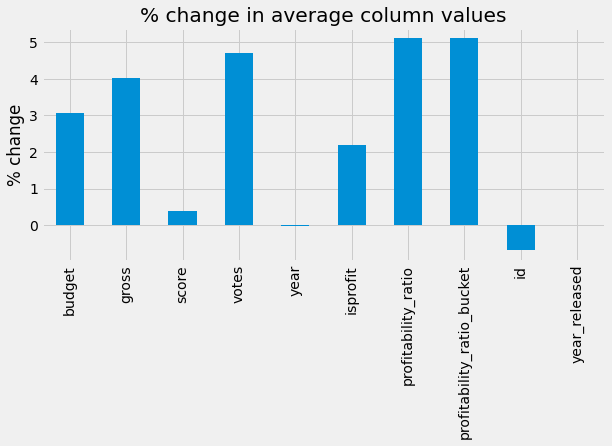

In [31]:
plt.figure(figsize=(9, 4))
change_in_means.plot.bar(title='% change in average column values')
plt.ylabel('% change')


Figure 1: Percent change in average column values
<p>Figure 1 shows the percent change in mean of columns before and after dropping missing-value rows.</p>

## 2.4. Finding Outliers <a class="anchor" id="24"></a>

### 2.4.1. IQR Score Method <a class="anchor" id="241"></a>

In [32]:
Q1 = data_dropped.quantile(0.25)
Q3 = data_dropped.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

budget                        4.000000e+07
gross                         5.531271e+07
score                         1.300000e+00
votes                         1.020740e+05
year                          1.300000e+01
isprofit                      1.000000e+00
profitability_ratio           1.566378e+00
profitability_ratio_bucket    1.500000e+02
id                            3.096300e+04
year_released                 1.400000e+01
dtype: float64


In [33]:
print((data_dropped < (Q1 - (1.5 * IQR))) | (data_dropped > (Q3 + (1.5 * IQR))))

      adult  budget  company  genres_edited  gross     id  imdb_id  isprofit  \
0     False   False    False          False  False  False    False     False   
1     False   False    False          False  False  False    False     False   
2     False   False    False          False   True  False    False     False   
3     False   False    False          False  False  False    False     False   
4     False   False    False          False  False  False    False     False   
...     ...     ...      ...            ...    ...    ...      ...       ...   
3332  False   False    False          False  False   True    False     False   
3333  False   False    False          False  False   True    False     False   
3334  False   False    False          False  False   True    False     False   
3335  False   False    False          False  False   True    False     False   
3336  False   False    False          False  False   True    False     False   

      keywords_edited   name  ...  prof

c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [34]:
data_dropped.shape

(3337, 22)

In [35]:
data_dropped_outlier_IQR = data_dropped[~((data_dropped < (Q1 - 1.5 * IQR)) | (data_dropped > (Q3 + 1.5 * IQR))).any(axis=1)]

c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [36]:
data_dropped_outlier_IQR.shape

(2213, 22)

In [37]:
data_dropped_outlier_IQR = data_dropped_outlier_IQR.reset_index()
del data_dropped_outlier_IQR['index']
data_dropped_outlier_IQR

,budget,company,gross,name,rating,released,score,votes,writer,year,...,profitability_ratio_bucket,adult,id,imdb_id,original_title,title,genres_edited,production_countries_edited,keywords_edited,year_released
0,9000000,Walt Disney Pictures,18564613,Flight of the Navigator,PG,1.08.1986 00:00,6.9,36636,Mark H. Baker,1986,...,110,FALSE,10122,tt0091059,Flight of the Navigator,Flight of the Navigator,"Family, Science Fiction, Adventure",US,"artificial intelligence, farewell, homesicknes...",1986
1,6000000,Other,8551228,Blue Velvet,R,23.10.1986 00:00,7.8,146768,David Lynch,1986,...,40,FALSE,793,tt0090756,Blue Velvet,Blue Velvet,"Crime, Drama, Mystery, Thriller",US,"small town, ear, suspense, independent film, p...",1986
2,16000000,Other,5900000,Highlander,R,7.03.1986 00:00,7.2,104860,Gregory Widen,1986,...,-60,FALSE,8009,tt0091203,Highlander,Highlander,"Adventure, Action, Fantasy","GB, US","new york, scotland, swordplay, sword, cut-off ...",1986
3,6000000,Twentieth Century Fox Film Corporation,8200000,Lucas,PG-13,28.03.1986 00:00,6.8,12228,David Seltzer,1986,...,40,FALSE,13346,tt0091445,Lucas,Lucas,"Comedy, Drama, Romance",US,"high school, american football team, cheerleading",1986
4,25000000,Twentieth Century Fox Film Corporation,11100000,Big Trouble in Little China,PG-13,2.07.1986 00:00,7.3,101678,Gary Goldman,1986,...,-60,FALSE,6978,tt0090728,Big Trouble in Little China,Big Trouble in Little China,"Action, Adventure, Comedy, Fantasy",US,"kung fu, chinatown, magic, mystery",1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,110000000,Warner Bros.,106580051,300: Rise of an Empire,R,7.03.2014 00:00,6.2,242932,Zack Snyder,2014,...,0,FALSE,53182,tt1253863,300: Rise of an Empire,300: Rise of an Empire,"Action, War",US,"based on graphic novel, ancient greece, during...",2014
2209,65000000,Other,13757804,Sin City: A Dame to Kill For,R,22.08.2014 00:00,6.5,126091,Frank Miller,2014,...,-80,FALSE,189,tt0458481,Sin City: A Dame to Kill For,Sin City: A Dame to Kill For,"Crime, Thriller",US,"detective, dystopia, dominatrix, murder, suspe...",2014
2210,70000000,Universal Pictures,56280355,Dracula Untold,PG-13,10.10.2014 00:00,6.3,152210,Matt Sazama,2014,...,-20,FALSE,49017,tt0829150,Dracula Untold,Dracula Untold,"Horror, Action, Drama, Fantasy, War",US,"vampire, dracula, bite, battle, 15th century, ...",2014
2211,95000000,Other,17223265,Seventh Son,PG-13,6.02.2015 00:00,5.5,61441,Charles Leavitt,2014,...,-80,FALSE,68737,tt1121096,Seventh Son,Seventh Son,"Adventure, Fantasy","CN, CA, US, GB","magic, chosen one, dark fantasy, witch hunter,...",2015


In [38]:
data_dropped_outlier_IQR.describe()

,budget,gross,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,year_released
count,2.213000e+03,2.213000e+03,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,2.975608e+07,3.016222e+07,6.277406,56139.378671,2000.145956,0.440127,0.103466,10.265251,17349.925441,2000.312246
std,2.372607e+07,3.055744e+07,0.852072,57979.197921,7.175464,0.496514,0.943570,94.446942,17329.777430,7.231800
min,3.800000e+04,3.090000e+02,3.900000,456.000000,1986.000000,0.000000,-0.999979,-100.000000,5.000000,1986.000000
25%,1.200000e+07,6.241697e+06,5.700000,13829.000000,1995.000000,0.000000,-0.603932,-60.000000,8766.000000,1995.000000
50%,2.400000e+07,2.024679e+07,6.300000,33955.000000,2000.000000,0.000000,-0.143212,-10.000000,11107.000000,2001.000000
75%,4.000000e+07,4.414341e+07,6.900000,78551.000000,2006.000000,1.000000,0.556479,60.000000,20504.000000,2006.000000
max,1.100000e+08,1.457943e+08,8.200000,270071.000000,2015.000000,1.000000,3.237761,320.000000,85889.000000,2015.000000


## 2.5. Box Plot <a class="anchor" id="25"></a>

### Boxplot of Initial Data

<AxesSubplot:>

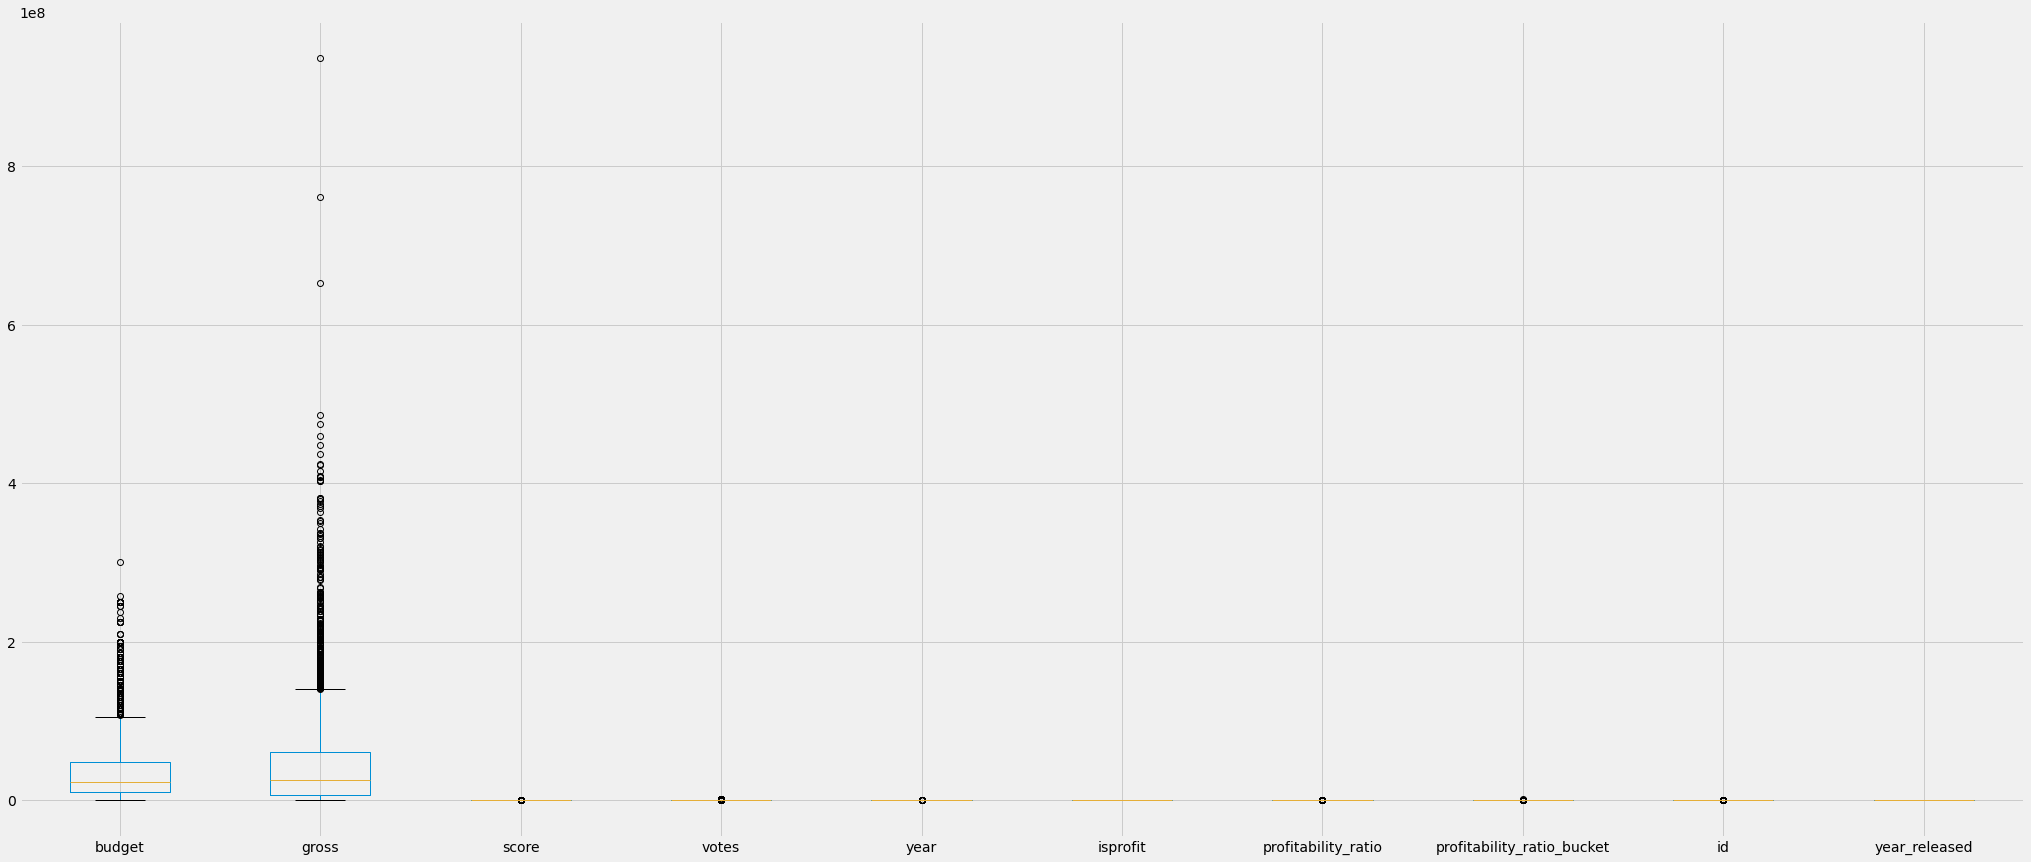

In [39]:
df.plot(x=df.index.name, kind='box', figsize=(32, 14))

Figure 2: Data Distribution before Cleaning
<p>Figure 2 shows the distribution of the data before dropping rows. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

### Boxplot of Dropped Data

<AxesSubplot:>

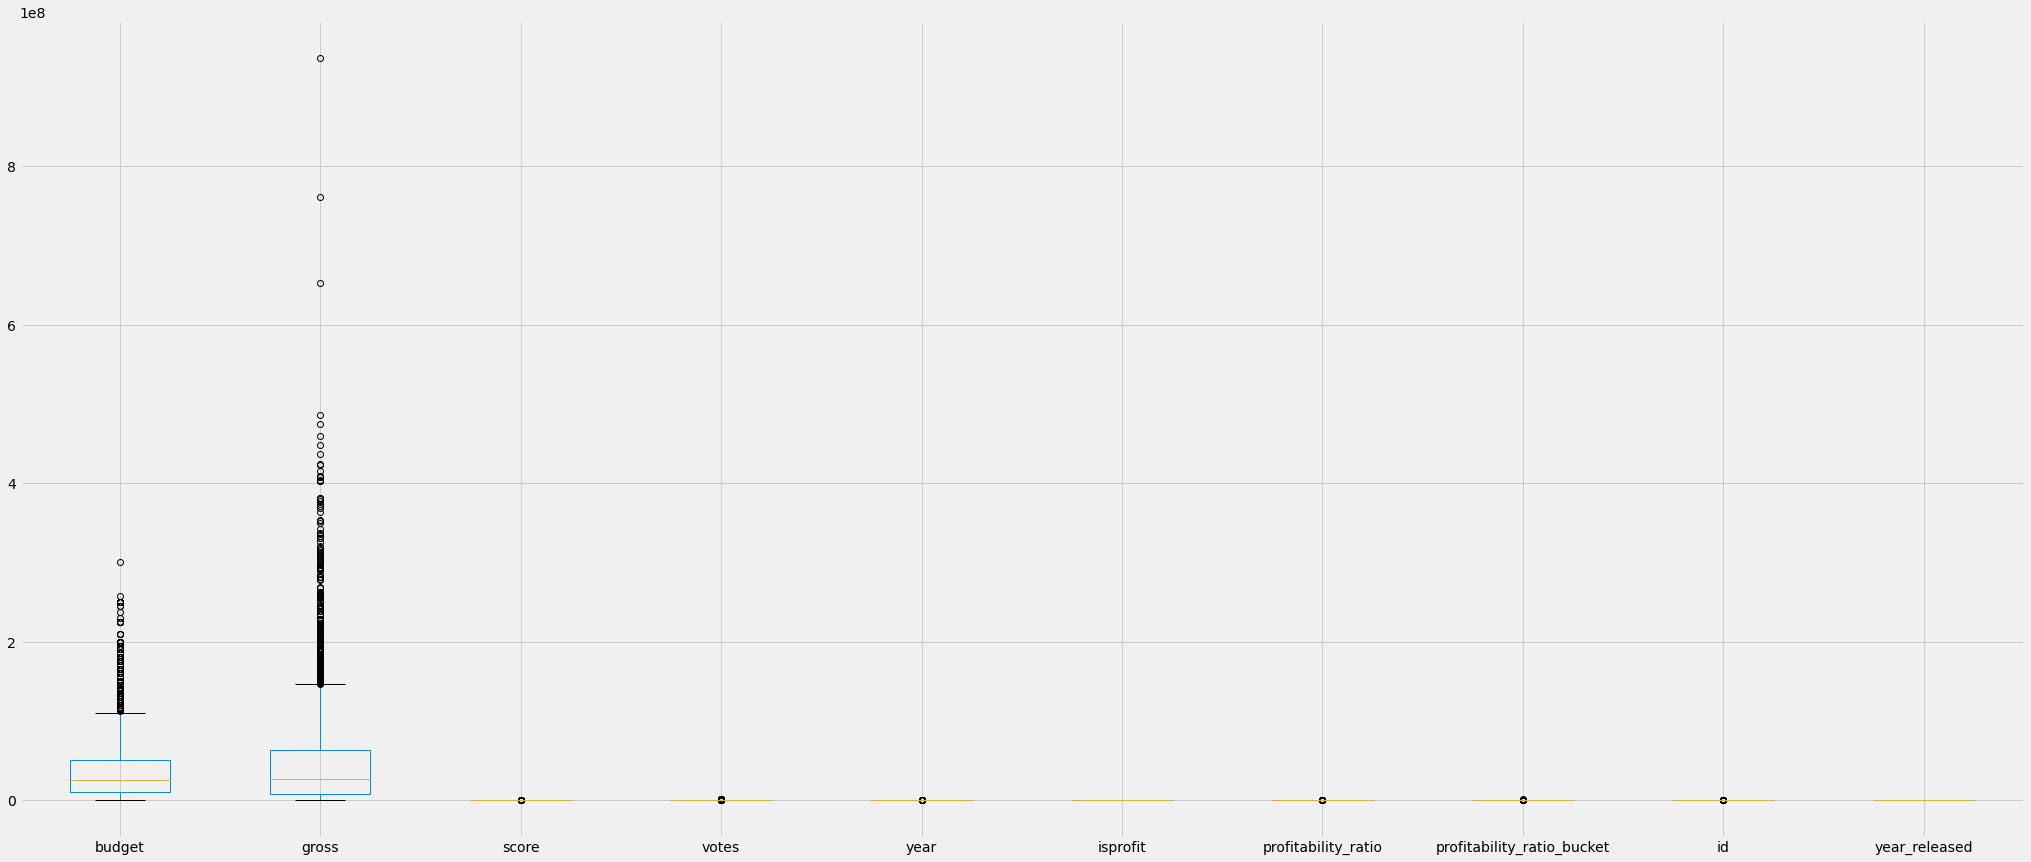

In [40]:
data_dropped.plot(x=data_dropped.index.name, kind='box', figsize=(32, 14))

Figure 3: Data Distribution of Dropped Data
<p>Figure 3 shows the distibution of data after dropping rows with the value NaN. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

### Boxplot of Dropped Outlier Data

<AxesSubplot:>

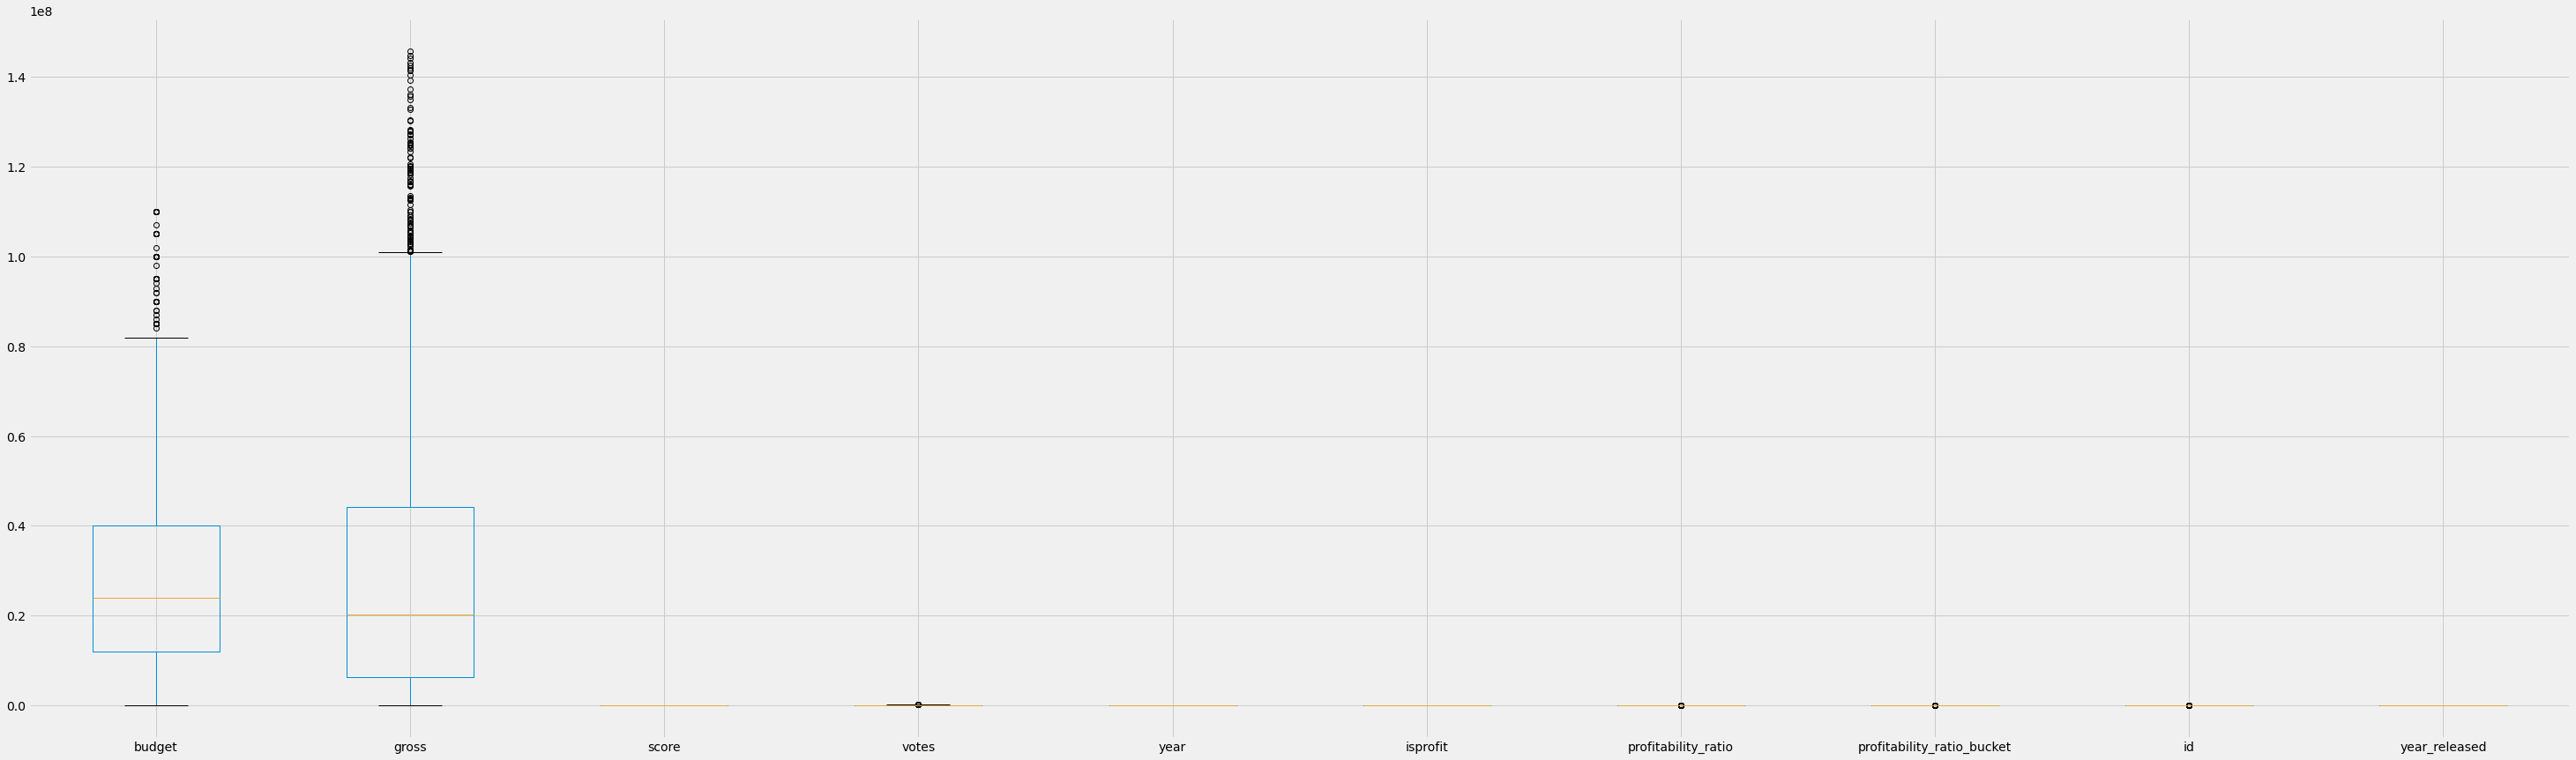

In [41]:
data_dropped_outlier_IQR.plot(x=data_dropped_outlier_IQR.index.name, kind='box', figsize=(46, 14))

Figure 4: Data Distribution of Outlier Data
<p>Figure 4 shows the distributoion of data after dropping outliers. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

# 3. Data Transformation <a class="anchor" id="3"></a>

Our data has the following columns that we can perform transformation on:
* budget
* runtime
* score
* votes
* popularity

<p>
> We want to discretize and normalize the data so it will be ready for the modeling stage.
<br><br>
> After writing some general functions, we will perform the transformations one by one.
</p>

## 3.1. Binning <a class="anchor" id="31"></a>

Below, we iterate over all continuous features and use binning to discretize the data. At the end, we summarize the results by indicating the 4 intervals that our data was partitioned into.

In [42]:
for i in continuous_features:
    display(data_dropped_outlier_IQR[i].describe())

    display(pd.qcut(data_dropped_outlier_IQR[i], q=4))

    display(pd.qcut(data_dropped_outlier_IQR[i], q=4).value_counts())

count    2.213000e+03
mean     2.975608e+07
std      2.372607e+07
min      3.800000e+04
25%      1.200000e+07
50%      2.400000e+07
75%      4.000000e+07
max      1.100000e+08
Name: budget, dtype: float64

0         (37999.999, 12000000.0]
1         (37999.999, 12000000.0]
2        (12000000.0, 24000000.0]
3         (37999.999, 12000000.0]
4        (24000000.0, 40000000.0]
                  ...            
2208    (40000000.0, 110000000.0]
2209    (40000000.0, 110000000.0]
2210    (40000000.0, 110000000.0]
2211    (40000000.0, 110000000.0]
2212     (24000000.0, 40000000.0]
Name: budget, Length: 2213, dtype: category
Categories (4, interval[float64]): [(37999.999, 12000000.0] < (12000000.0, 24000000.0] < (24000000.0, 40000000.0] < (40000000.0, 110000000.0]]

(37999.999, 12000000.0]      599
(40000000.0, 110000000.0]    550
(24000000.0, 40000000.0]     543
(12000000.0, 24000000.0]     521
Name: budget, dtype: int64

count    2213.000000
mean        6.277406
std         0.852072
min         3.900000
25%         5.700000
50%         6.300000
75%         6.900000
max         8.200000
Name: score, dtype: float64

0         (6.3, 6.9]
1         (6.9, 8.2]
2         (6.9, 8.2]
3         (6.3, 6.9]
4         (6.9, 8.2]
            ...     
2208      (5.7, 6.3]
2209      (6.3, 6.9]
2210      (5.7, 6.3]
2211    (3.899, 5.7]
2212      (5.7, 6.3]
Name: score, Length: 2213, dtype: category
Categories (4, interval[float64]): [(3.899, 5.7] < (5.7, 6.3] < (6.3, 6.9] < (6.9, 8.2]]

(3.899, 5.7]    582
(6.3, 6.9]      573
(5.7, 6.3]      545
(6.9, 8.2]      513
Name: score, dtype: int64

count      2213.000000
mean      56139.378671
std       57979.197921
min         456.000000
25%       13829.000000
50%       33955.000000
75%       78551.000000
max      270071.000000
Name: votes, dtype: float64

0        (33955.0, 78551.0]
1       (78551.0, 270071.0]
2       (78551.0, 270071.0]
3        (455.999, 13829.0]
4       (78551.0, 270071.0]
               ...         
2208    (78551.0, 270071.0]
2209    (78551.0, 270071.0]
2210    (78551.0, 270071.0]
2211     (33955.0, 78551.0]
2212     (13829.0, 33955.0]
Name: votes, Length: 2213, dtype: category
Categories (4, interval[float64]): [(455.999, 13829.0] < (13829.0, 33955.0] < (33955.0, 78551.0] < (78551.0, 270071.0]]

(455.999, 13829.0]     554
(13829.0, 33955.0]     553
(33955.0, 78551.0]     553
(78551.0, 270071.0]    553
Name: votes, dtype: int64

## 3.2. Normalization <a class="anchor" id="32"></a>

### 3.2.1. Z-score Method <a class="anchor" id="321"></a>

In [43]:
data_dropped_outlier_IQR[continuous_features].describe()

,budget,score,votes
count,2.213000e+03,2213.000000,2213.000000
mean,2.975608e+07,6.277406,56139.378671
std,2.372607e+07,0.852072,57979.197921
min,3.800000e+04,3.900000,456.000000
25%,1.200000e+07,5.700000,13829.000000
50%,2.400000e+07,6.300000,33955.000000
75%,4.000000e+07,6.900000,78551.000000
max,1.100000e+08,8.200000,270071.000000


In [44]:
scaler = StandardScaler()

In [45]:
data_dropped_z_score_scaled = pd.DataFrame(scaler.fit_transform(data_dropped_outlier_IQR[continuous_features]), columns=continuous_features)

In [46]:
data_dropped_z_score_scaled.describe()

,budget,score,votes
count,2.213000e+03,2.213000e+03,2.213000e+03
mean,-5.137227e-17,-4.286374e-16,-7.705841e-17
std,1.000226e+00,1.000226e+00,1.000226e+00
min,-1.252832e+00,-2.790778e+00,-9.606198e-01
25%,-7.485473e-01,-6.778029e-01,-7.299160e-01
50%,-2.426603e-01,2.652226e-02,-3.827130e-01
75%,4.318557e-01,7.308474e-01,3.866333e-01
max,3.382863e+00,2.256885e+00,3.690634e+00


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'score'}>],
       [<AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'isprofit'}>],
       [<AxesSubplot:title={'center':'profitability_ratio'}>,
        <AxesSubplot:title={'center':'profitability_ratio_bucket'}>,
        <AxesSubplot:title={'center':'id'}>],
       [<AxesSubplot:title={'center':'year_released'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

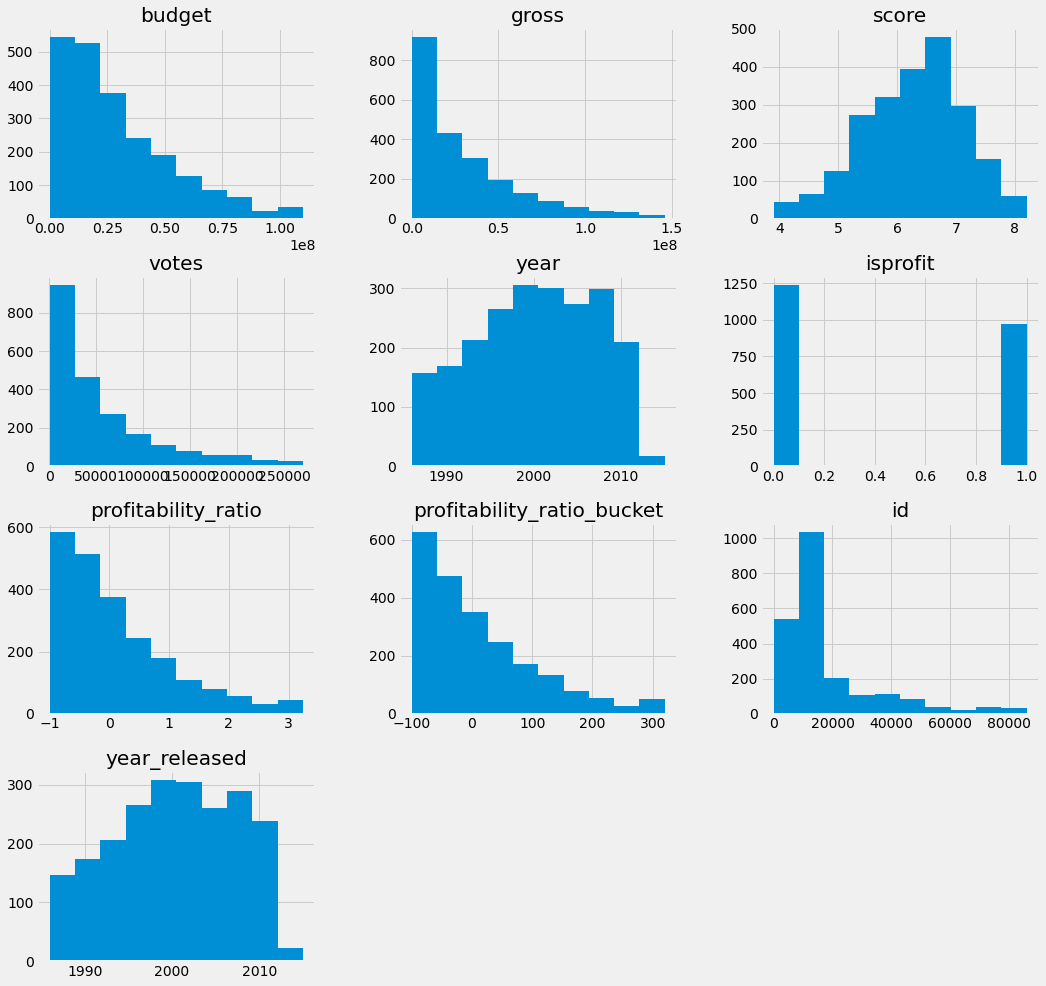

In [47]:
data_dropped_outlier_IQR.hist(figsize=(16, 16))

Figure 6: Histogram of Data Before Normalization
<p>Figure 6 shows the bar charts helping us visualize the data befor the five features above have been normalized.</p>

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'score'}>],
       [<AxesSubplot:title={'center':'votes'}>, <AxesSubplot:>]],
      dtype=object)

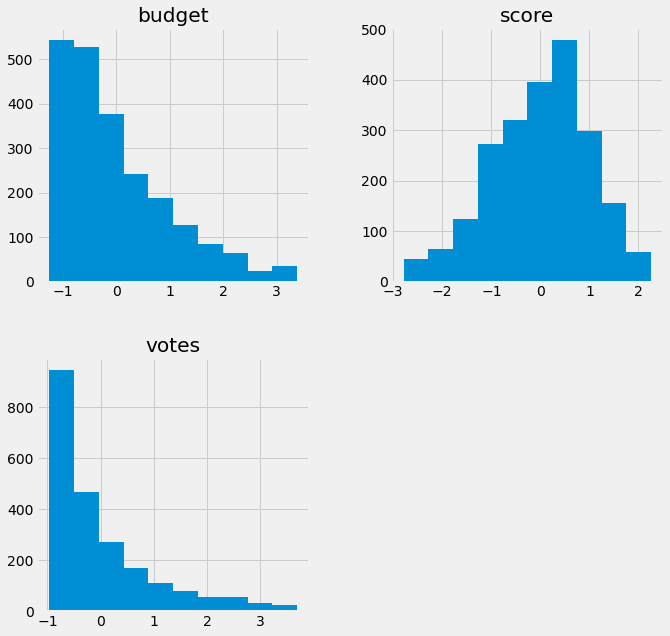

In [48]:
data_dropped_z_score_scaled.hist(figsize=(10, 10))

Figure 7: Histogram of Data After Normalization
<p>Figure 7 shows bar charts helping us visualize the data after the five features above have been normalized.</p>

Add normalized columns to main dataset as new columns labeled with the feature name they relate to followed by "_norm".

In [49]:
norm_column_names = ['budget_norm', 'score_norm', 'votes_norm']
    
for i, j in zip(norm_column_names, continuous_features):
    data_dropped_outlier_IQR[i] = pd.Series(data_dropped_z_score_scaled[j])


In [50]:
data_dropped_outlier_IQR.to_csv('data/training_data.csv')

# 4. Results <a class="anchor" id="4"></a>

## 4.1. Data Cleaning <a class="anchor" id="41"></a>

As we analyze all the features in <a href="#21">Section 2.1.</a> we can see that the only features that need cleaning are overview, tagline, spoken_languages_edited, production_countries_edited and keywords_edited. The rest of the features are clean meaning not missing any values that require either dropping or replacement of those values.

## 4.2. Data Transformation <a class="anchor" id="42"></a>

After analyzing and cleaning the five categorical features found in <a href="#21">Section 2.1.</a> we are able to focus on transforming our data.  

<p>Our data includes categorical and continuous types but for transformation we want to focus on five that need to be discretized and normalized in order to be ready for modeling. These five features include budget, runtime, score, votes and popularity. The reason for discretizing the data is so we can partition the data into equal distributions that will be easier to manage and manipulate. After that we can use normalization to give all the attributes an equal weight which is useful to us in the following section where we model our data.</p>